Author: Philip Borozenets <p>
This python notebook takes all the CSV files from other python notebooks into a single CSV file for easier manipulation by each team members for their ML models. 

Clears all the files in the notebook so if there were any changes to the csv files on github it will use the latest version


In [ ]:
%rm -rf stonks/

Pulls all the csv files from our shared github


In [ ]:
%%capture
!git clone https://github.com/IS737StockPicker/stonks

Imports the standard python libraries

In [ ]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Pulls Stock Data from CSV file to DataFrame<p>
Also converts the date string into a datetime format for easier merging of news sentiment data frames

In [ ]:
stocks_df = pd.read_csv('/content/stonks/Stocks_march_sept.csv')
# this for loop changes the date/time format in the stock price csv file into Year/Month/Day format
for index, rows in stocks_df.iterrows():
  stripped_date = stocks_df['Date'].iloc[index]
  stripped_date = stripped_date[:len(stripped_date)-15]
  stocks_df['Date'].iloc[index] = stripped_date
stocks_df['Date']= pd.to_datetime(stocks_df['Date'], format= '%Y-%m-%d')
stocks_df

<ipython-input-4-704cfd00dc65>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_df['Date'].iloc[index] = stripped_date


,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,XLB,XLP,SPY,^DJI,NDX
0,2022-03-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,2022-03-15,1,1,1,1,1,1,1,0,1,1,1,1,1,1.0
2,2022-03-16,0,1,0,1,1,1,1,1,1,1,0,1,1,1.0
3,2022-03-17,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
4,2022-03-18,1,1,0,1,1,1,1,1,1,1,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2023-04-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
272,2023-04-13,1,1,1,1,1,1,1,0,1,1,1,1,1,1.0
273,2023-04-14,1,0,0,1,1,0,1,0,1,0,0,0,0,1.0
274,2023-04-17,0,1,1,1,1,0,1,1,1,1,1,1,1,1.0


For future stock price prediction, we shift the values up one row so that the stock price for the next day is used

In [ ]:
tickers = stocks_df.columns.values.tolist()
tickers.remove('Date')
future_df = stocks_df
for ticker in tickers:
  future_df[ticker] = future_df[ticker].shift(-1)

future_df  

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,XLB,XLP,SPY,^DJI,NDX
0,2022-03-14,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2022-03-15,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2022-03-16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2022-03-17,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2022-03-18,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2023-04-12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
272,2023-04-13,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
273,2023-04-14,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
274,2023-04-17,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,NaN


Checking how many rows and columns in the dataset

In [ ]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    276 non-null    datetime64[ns]
 1   XLE     275 non-null    float64       
 2   XLF     275 non-null    float64       
 3   XLU     275 non-null    float64       
 4   XLI     275 non-null    float64       
 5   XLK     275 non-null    float64       
 6   XLV     275 non-null    float64       
 7   XLY     275 non-null    float64       
 8   IYR     275 non-null    float64       
 9   AAPL    275 non-null    float64       
 10  XLB     275 non-null    float64       
 11  XLP     275 non-null    float64       
 12  SPY     275 non-null    float64       
 13  ^DJI    275 non-null    float64       
 14  NDX     274 non-null    float64       
dtypes: datetime64[ns](1), float64(14)
memory usage: 32.5 KB


Heatmap of the different stock tickers. We do not want to use stock tickers that are highly correlated to one another because we want to narrow down the number of tickers we examine

<ipython-input-7-c18b4f82c138>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stocks_df.corr(), cmap="YlGnBu", annot=True, vmin = 0, vmax = 1)


<Axes: >

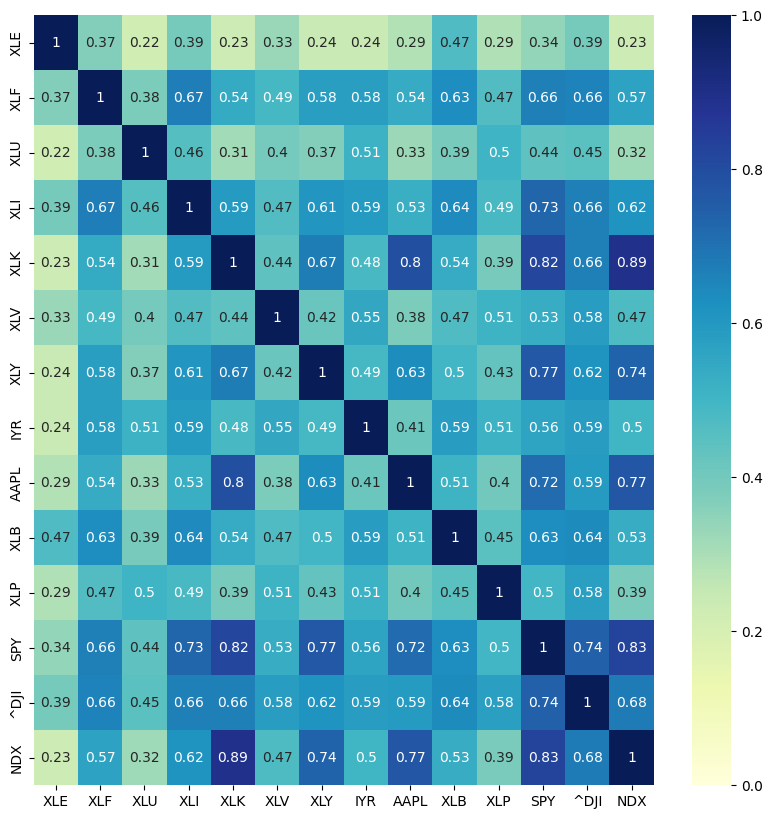

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(stocks_df.corr(), cmap="YlGnBu", annot=True, vmin = 0, vmax = 1)

Importing Guardian News Sentiment CSV into df

In [ ]:
guardian_df = pd.read_csv('/content/stonks/guardian_data.csv')
guardian_df['Date']= pd.to_datetime(guardian_df['Date'], format= '%Y-%m-%d')
guardian_df = guardian_df.rename(columns={"Headline Mean":"guardian_headline_mean","Body Mean":"guardian_body_mean","Headline Median":"guardian_headline_median","Body Median":"guardian_body_median","Headline Min":"guardian_headline_min","Headline Max":"guardian_headline_max","Body Min":"guardian_body_min","Body Max":"guardian_body_max"})
guardian_df


,Date,guardian_headline_mean,guardian_body_mean,guardian_headline_median,guardian_body_median,guardian_headline_min,guardian_headline_max,guardian_body_min,guardian_body_max
0,2022-03-13,-0.08,-0.15,0.00,-0.88,-0.89,0.89,-1.0,1.0
1,2022-03-14,-0.13,-0.01,0.00,-0.00,-0.78,0.72,-1.0,1.0
2,2022-03-15,-0.20,-0.12,-0.15,-0.54,-0.93,0.79,-1.0,1.0
3,2022-03-16,-0.08,-0.16,0.00,-0.55,-0.82,0.69,-1.0,1.0
4,2022-03-17,-0.10,-0.24,0.00,-0.85,-0.83,0.77,-1.0,1.0
...,...,...,...,...,...,...,...,...,...
180,2022-09-09,-0.08,0.35,0.00,0.95,-0.85,0.77,-1.0,1.0
181,2022-09-10,-0.06,0.17,0.00,0.77,-0.89,0.76,-1.0,1.0
182,2022-09-11,-0.07,0.16,0.00,0.67,-0.79,0.78,-1.0,1.0
183,2022-09-12,-0.16,0.01,0.00,0.10,-0.93,0.76,-1.0,1.0


Importing NYT News Sentiment CSV into df

In [ ]:
NYT_df = pd.read_csv('/content/stonks/ny_times_merged_data.csv')
NYT_df['Date']= pd.to_datetime(NYT_df['Date'], format= '%Y-%m-%d')
NYT_df = NYT_df.rename(columns={"Headline Mean":"NYT_headline_mean","Headline Median":"NYT_headline_median","Body Mean":"NYT_body_mean","Body Median":"NYT_body_median","Headline Max":"NYT_headline_max","Headline Min":"NYT_headline_min","Body Max":"NYT_body_max","Body Min":"NYT_body_min"})
NYT_df

,Date,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median,NYT_headline_max,NYT_headline_min,NYT_body_max,NYT_body_min
0,2022-03-13,-0.11,0.0,0.22,0.25,0.84,-0.86,0.95,-0.86
1,2022-03-14,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
2,2022-03-15,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
3,2022-03-16,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
4,2022-03-17,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89
...,...,...,...,...,...,...,...,...,...
180,2022-09-09,-0.01,0.0,0.14,0.14,0.81,-0.80,0.85,-0.91
181,2022-09-10,0.09,0.0,0.13,0.00,0.94,-0.80,0.87,-0.85
182,2022-09-11,0.01,0.0,-0.14,0.00,0.77,-0.88,0.90,-0.79
183,2022-09-12,-0.10,0.0,-0.06,-0.13,0.75,-0.90,0.89,-0.89


Importing Huffington Post News Sentiment CSV into df

In [ ]:
Huff_df = pd.read_csv('/content/stonks/Huff_News_Avg_News_Sentiment.csv')
Huff_df = Huff_df.rename(columns={"date":"Date"})
Huff_df['Date']= pd.to_datetime(Huff_df['Date'], format= '%Y-%m-%d')
Huff_df = Huff_df.rename(columns={"Headline Mean":"Huff_headline_mean","Headline Median":"Huff_headline_median","Body Mean":"Huff_body_mean","Body Median":"Huff_body_median","Headline Max":"Huff_headline_max","Body Max":"Huff_body_max","Headline Min":"Huff_headline_min","Body Min":"Huff_body_min"})

Huff_df

,Date,Huff_headline_mean,Huff_body_mean,Huff_headline_median,Huff_body_median,Huff_headline_max,Huff_body_max,Huff_headline_min,Huff_body_min
0,2022-03-13,-0.24,0.05,-0.21,0.19,0.00,0.44,-0.54,-0.61
1,2022-03-14,-0.12,-0.06,0.00,0.00,0.74,0.30,-0.80,-0.67
2,2022-03-15,-0.44,-0.39,-0.46,-0.47,0.00,0.13,-0.76,-0.85
3,2022-03-16,0.10,-0.09,0.00,-0.13,0.51,0.40,-0.25,-0.56
4,2022-03-17,-0.20,-0.14,-0.03,-0.03,0.56,0.00,-0.90,-0.49
...,...,...,...,...,...,...,...,...,...
178,2022-09-09,-0.10,0.25,-0.10,0.25,0.40,0.49,-0.60,0.00
179,2022-09-10,-0.22,0.23,-0.34,0.34,0.00,0.57,-0.40,-0.18
180,2022-09-11,-0.31,-0.27,-0.33,-0.36,0.05,0.34,-0.61,-0.69
181,2022-09-12,-0.40,0.27,-0.42,0.38,0.00,0.42,-0.79,0.00


Merging the data frames together using the "Date" as the anchor column

In [ ]:
merged_df = pd.merge(stocks_df,guardian_df, how="right", on="Date")
merged_df = pd.merge(merged_df,Huff_df, on= "Date")
merged_df = pd.merge(merged_df,NYT_df, how="right", on= "Date")
merged_df = merged_df.dropna()
merged_df

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,...,Huff_headline_min,Huff_body_min,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median,NYT_headline_max,NYT_headline_min,NYT_body_max,NYT_body_min
1,2022-03-14,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,-0.80,-0.67,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
2,2022-03-15,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.76,-0.85,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
3,2022-03-16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.25,-0.56,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
4,2022-03-17,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.90,-0.49,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89
5,2022-03-18,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.60,-0.76,-0.06,0.0,-0.05,-0.08,0.83,-0.82,0.86,-0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2022-09-07,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-0.78,-0.57,0.09,0.0,-0.07,0.00,0.65,-0.86,0.84,-0.93
179,2022-09-08,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.77,-0.83,-0.04,0.0,-0.02,0.00,0.75,-0.90,0.92,-0.93
180,2022-09-09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.60,0.00,-0.01,0.0,0.14,0.14,0.81,-0.80,0.85,-0.91
183,2022-09-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.79,0.00,-0.10,0.0,-0.06,-0.13,0.75,-0.90,0.89,-0.89


<Axes: >

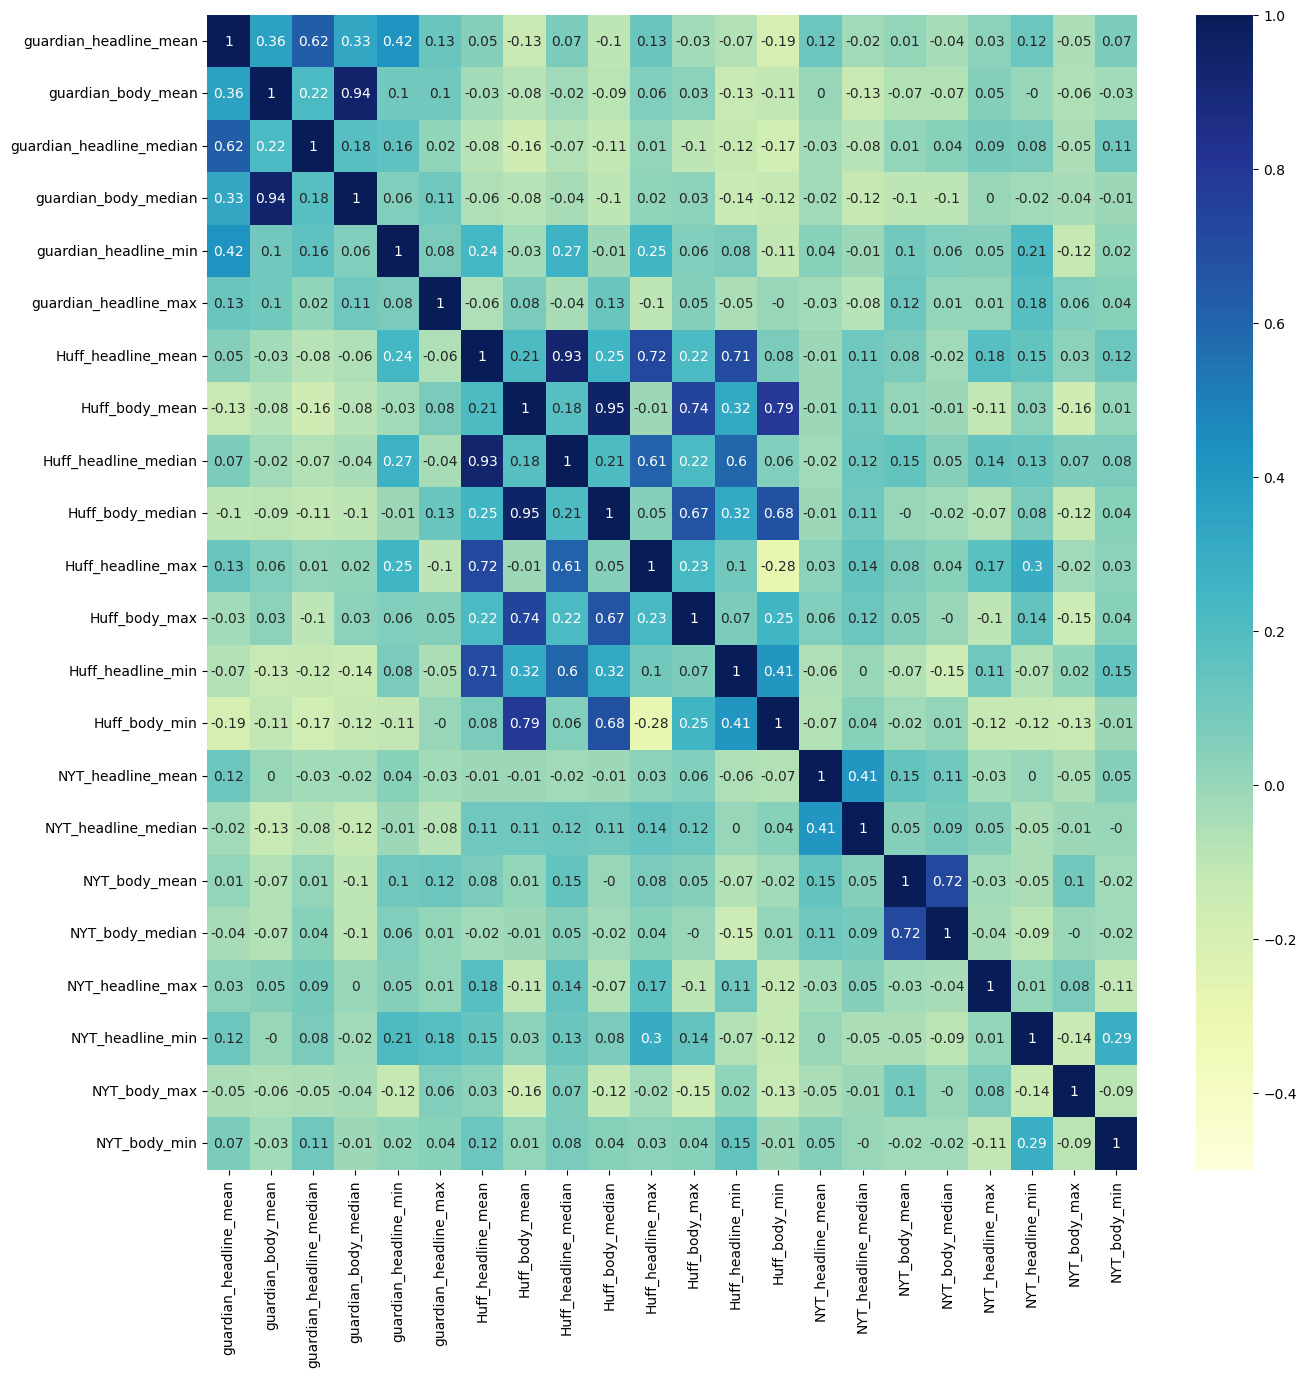

In [ ]:
input_vars = merged_df.iloc[:,15:]
input_vars = input_vars.drop(columns = ['guardian_body_min','guardian_body_max'])
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(round(input_vars.corr(),2), cmap="YlGnBu", annot=True, vmin = -0.5, vmax = 1)

Merging the three news dataframes and stock price dataframe into one master dataframe to create a master CSV file for everyone on the team to use

In [ ]:
merged_future_df = pd.merge(future_df,guardian_df, how="right", on="Date")
merged_future_df = pd.merge(merged_future_df,Huff_df, on= "Date")
merged_future_df = pd.merge(merged_future_df,NYT_df, how="right", on= "Date")
merged_future_df = merged_future_df.dropna()
merged_future_df

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,...,Huff_headline_min,Huff_body_min,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median,NYT_headline_max,NYT_headline_min,NYT_body_max,NYT_body_min
1,2022-03-14,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,-0.80,-0.67,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
2,2022-03-15,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.76,-0.85,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
3,2022-03-16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.25,-0.56,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
4,2022-03-17,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.90,-0.49,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89
5,2022-03-18,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.60,-0.76,-0.06,0.0,-0.05,-0.08,0.83,-0.82,0.86,-0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2022-09-07,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-0.78,-0.57,0.09,0.0,-0.07,0.00,0.65,-0.86,0.84,-0.93
179,2022-09-08,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.77,-0.83,-0.04,0.0,-0.02,0.00,0.75,-0.90,0.92,-0.93
180,2022-09-09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.60,0.00,-0.01,0.0,0.14,0.14,0.81,-0.80,0.85,-0.91
183,2022-09-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.79,0.00,-0.10,0.0,-0.06,-0.13,0.75,-0.90,0.89,-0.89


Write dataframe to CSV file

In [ ]:
merged_df.to_csv("master_data.csv", index = False)
merged_future_df.to_csv("master_data_future.csv", index = False)

Checking how many rows and columns are in the dataframe

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 1 to 184
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      125 non-null    datetime64[ns]
 1   XLE                       125 non-null    float64       
 2   XLF                       125 non-null    float64       
 3   XLU                       125 non-null    float64       
 4   XLI                       125 non-null    float64       
 5   XLK                       125 non-null    float64       
 6   XLV                       125 non-null    float64       
 7   XLY                       125 non-null    float64       
 8   IYR                       125 non-null    float64       
 9   AAPL                      125 non-null    float64       
 10  XLB                       125 non-null    float64       
 11  XLP                       125 non-null    float64       
 12  SPY                   

Heatmap of the different features in the guardian dataset to see if there are are any dependencies. The mean and median sentiment score of the body text are highly correlated meaning some ML models could potentially overfit if they were used together



<ipython-input-15-1591375d5e5f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(guardian_df.corr(), cmap="YlGnBu", annot=True, vmin = 0, vmax = 1)


<Axes: >

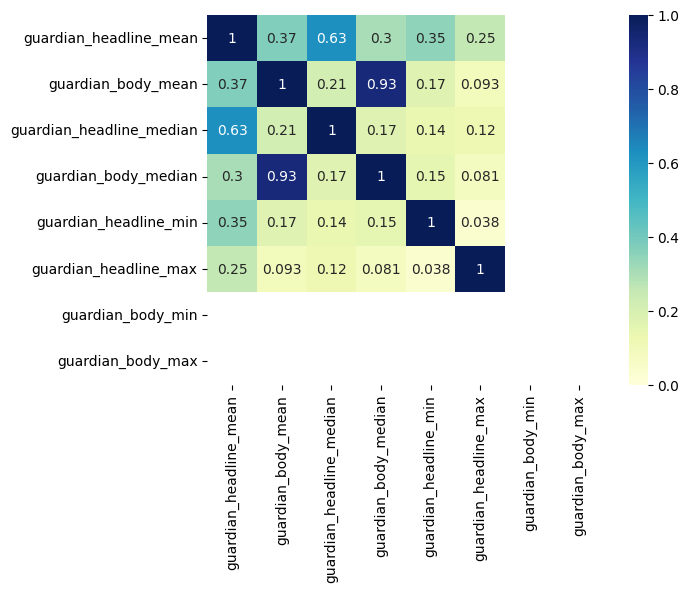

In [ ]:
sns.heatmap(guardian_df.corr(), cmap="YlGnBu", annot=True, vmin = 0, vmax = 1)